In [11]:
import yfinance as yf
import pandas as pd

In [33]:
# data collection
ticker = 'AAPL'
data = yf.download(ticker)

# data preprocessing
data['10-day'] = data['Close'].rolling(window=10).mean()
data['50-day'] = data['Close'].rolling(window=50).mean()

data = data.dropna()

X = data[['Close', '10-day', '50-day']] 
y = data['Close'].shift(-1).dropna() # target
X = X[:-1]

# split into 80% train 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[*********************100%***********************]  1 of 1 completed

0.10602699965238571


In [16]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.9417427480818917
R² Score: 0.9996207023196627


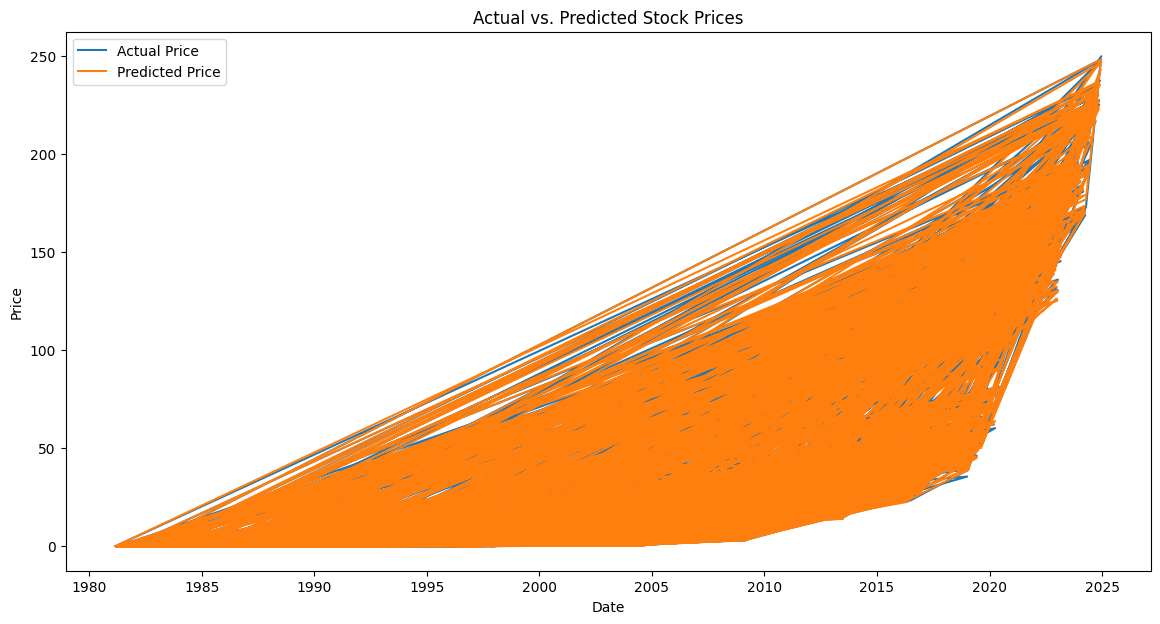

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

In [35]:
initial_balance = 100
balance = initial_balance
num_shares = 0

for i in range(len(X_test)):
    current_price = X_test.iloc[i]['Close'][ticker]
    predicted_price = predictions[i]

    if predicted_price > current_price and balance >= current_price: # buy
        shares_to_buy = balance // current_price
        if shares_to_buy > 0:
            num_shares += shares_to_buy
            balance -= shares_to_buy * current_price
            print(f'Buying {shares_to_buy} shares at {current_price:.2f}')
    elif predicted_price < current_price and num_shares > 0: # sell
        balance += num_shares * current_price
        print(f'Selling {num_shares} shares at {current_price:.2f}')
        num_shares = 0

final_balance = balance + (num_shares * X_test.iloc[-1]['Close'][ticker])
profit = final_balance - initial_balance
print(f'Final Balance: {final_balance}')
print(f'Profit: {profit}')

Buying 46.0 shares at 2.13
Selling 46.0 shares at 95.34
Buying 8436.0 shares at 0.52
Buying 1.0 shares at 0.37
Selling 8437.0 shares at 118.28
Buying 22652.0 shares at 44.05
Buying 21.0 shares at 0.42
Buying 1.0 shares at 0.23
Selling 22674.0 shares at 115.71
Buying 29568475.0 shares at 0.09
Selling 29568475.0 shares at 172.17
Buying 14666763827.0 shares at 0.35
Selling 14666763827.0 shares at 146.39
Buying 6895240602777.0 shares at 0.31
Selling 6895240602777.0 shares at 19.12
Buying 1046091043142.0 shares at 126.04
Buying 2.0 shares at 12.05
Buying 89.0 shares at 0.08
Selling 1046091043233.0 shares at 168.49
Buying 2091735305886940.0 shares at 0.08
Selling 2091735305886940.0 shares at 77.58
Buying 4.8519989044860264e+16 shares at 3.34
Selling 4.8519989044860264e+16 shares at 79.72
Buying 7.281195302238832e+18 shares at 0.53
Selling 7.281195302238832e+18 shares at 210.62
Buying 1.495183871899501e+21 shares at 1.03
Selling 1.495183871899501e+21 shares at 32.13
Buying 1.3666890516483088e